<a href="https://colab.research.google.com/github/bengy124/Drug-Discovery-ML/blob/main/Drug_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection and Pre-processing

In [1]:
#Installing chembl web resource
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


To begin, you search for a "target" being either a target protein or organism that the drug/molecule will act on, we want to see the modulatory effect the drug compound will have on the target whether it activates or inhibits the protein/organism. For this example, I used Aromatase which is an enzyme part of the cytochrome P450 which is linked with breast cancer tissue formation. After selecting a target, it will search and gather data from Chembl and filter for Inhibitory Concentration at 50% (IC50), meaning the drug will elicit a 50% inhibition of the target protein, and output a dataset. The data also features the Standard Value of a molecule which quantifies the potency. The lower the value the better as it refers to the concentration of the drug a person must consume in order to elicit the IC50.



In [3]:
#Searching of target
target = new_client.target
target_query = target.search('aromatase') #target input
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [4]:
#Selection of target
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [5]:
#Creating filtered df for IC50 of selected target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
df=pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [6]:
#Coverting df to csv
df.to_csv('bioactivity_data.csv',index=False)

In [7]:
#Saving to google drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [8]:
!mkdir "/content/gdrive/My Drive/Projects/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Projects/Colab Notebooks/data’: File exists


In [9]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/Projects/Colab Notebooks/data"

In [10]:
!ls -l "/content/gdrive/My Drive/Projects/Colab Notebooks/data"

total 1460
-rw------- 1 root root 1494977 Mar 31 05:34 bioactivity_data.csv


In [11]:
!head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,,,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,,,CHEMBL1133116,J Med Chem,2000,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', 'sei': '12.21'}",CHEMBL341591,,CHEMBL341591,5.15,0,http://www.openphacts.org/uni

*Saving to Google Drive*

In [12]:
#Filtering to remove NaN values
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-12-89619a5c33eb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [13]:
#Removing duplicates
df2_1 = df2.drop_duplicates(['canonical_smiles'])
df2_1

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742455,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,0.09
2956,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742456,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,0.72
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031


In [14]:
#Creating new df with selected rows
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_1[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2955,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09
2956,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72
2962,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0
2963,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0


In [15]:
#Output to csv
df3.to_csv('new_bioacivity_preprocessed.csv', index = False)

The dataset then goes through pre-processing in which labels are assigned to the molecules to show their bioactivity. Molecules with a Standard Value less than 1000 nM will be labelled active, if greater than 10,000 then labelled as inactive and in between 1000 and 10,000 will be labelled as intermediate. After, it creates a new dataset containing only the Molecule ID, Standard Value, Bioactivity, and Canonical Smiles which is a notation that represents the chemical structure of the molecule.

In [16]:
df3_1 = pd.read_csv('new_bioacivity_preprocessed.csv')

In [17]:
#Function to assign class identification of either active, inactive, or intermediate based on standard_value
bioactivity_class = []
for i in df3_1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [18]:
#New df with bioactivity_class included
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4=pd.concat([df3_1,pd.Series(bioactivity_class)], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active


In [19]:
#Output to csv
df4.to_csv('bioactivity_data.csv', index=False)

In [20]:
! ls -l

total 300
-rw-r--r-- 1 root root 155881 Mar 31 05:34 bioactivity_data.csv
drwx------ 5 root root   4096 Mar 31 05:34 gdrive
-rw-r--r-- 1 root root 136437 Mar 31 05:34 new_bioacivity_preprocessed.csv
drwxr-xr-x 1 root root   4096 Mar 28 23:00 sample_data


In [21]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

cp: cannot create regular file '/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data': No such file or directory


In [22]:
! ls "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

ls: cannot access '/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data': No such file or directory


### EDA

In [23]:
#Installing conda and rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-03-31 05:34:40--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   212MB/s    in 0.4s    

2024-03-31 05:34:41 (212 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

With the pre-processed dataset it can begin the Exploratory Data Analysis (EDA) in which it will calculate Lipinski descriptors for each molecule. These descriptors were created by Christopher Lipinski, who was a scientist at Pfizer that came up with rules for the assessment of drug-likeness based on the pharmacokinetic profile of absorption, distribution, metabolism, and excretion (ADME). He created a set of rules that can help predict how successful an oral drug can be based on the following: a Molecular Weight less than 500 Daltons, an Octanol-water partition coefficient aka LogP (refers to solubility) less than 5, no more than 5 hydrogen bond donors, and no more than 10 hydrogen bond acceptors. For a drug to be orally bioavailable it can not break more than one of these rules.


In [24]:
df5 = pd.read_csv('bioactivity_data.csv')

In [25]:
#Removing canonical_smiles
df_nosmiles = df5.drop(columns='canonical_smiles')

#Empty list to store longest compound from each canonical_smiles
smiles = []

#Loop to split canonical_smile into compunds and then append the longest compound from split compounds
for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd,key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')



In [26]:
#New df with updated canonical_smiles
df_cleaned_smiles = pd.concat([df_nosmiles,smiles],axis=1)
df_cleaned_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL341591,7100.00,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.00,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.00,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.00,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.00,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2111,CHEMBL5203413,0.09,active,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1
2112,CHEMBL5179009,0.72,active,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1
2113,CHEMBL5184829,10000.00,inactive,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...
2114,CHEMBL5176279,31.00,active,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1


In [27]:
import numpy as np
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [28]:
#Function to calculate lipinski descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #Converting each smiles string into a molecule using rdkit
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        #Calculating descriptors for each molecule
        desc_MolWt = Descriptors.MolWt(mol) #Molecular weight
        desc_MolLogP = Descriptors.MolLogP(mol) #LogP
        desc_NumHDonors = Lipinski.NumHDonors(mol) #Number of H donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #Number of HG acceptors

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    #Defining column names
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    #New df with calculated descriptors
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [29]:
#Lipinski function applied to df_cleaned_smiles.canonical_smiles to calculate descriptors
df_lipinski=lipinski(df_cleaned_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2111,368.396,3.93578,0.0,6.0
2112,382.423,4.32588,0.0,6.0
2113,373.416,3.11580,2.0,5.0
2114,369.446,3.85650,1.0,7.0


In [30]:
#Adding lipinski descriptors
df_combined=pd.concat([df5,df_lipinski],axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active,368.396,3.93578,0.0,6.0
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active,382.423,4.32588,0.0,6.0
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive,373.416,3.11580,2.0,5.0
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active,369.446,3.85650,1.0,7.0


In [31]:
#Function to normalize standard_value
def norm_value(input):
    norm = []

    #Loop to set a value to 100000000 if it is greater than 100000000
    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    #Add standard_value_norm as new column and drop standard_value
    input['standard_value_norm'] = norm
    x = input.drop('standard_value',1)

    return x

In [32]:
#Function to calculte pIC50 values
def pIC50(input):
    pIC50 = []
    #Loop to convert standard_value_norm from nM to M by multiplying by 10^-9
    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    #Add calculated pIC50 values as new column and drop standard_value_norm
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x


In [33]:
df_combined.standard_value.describe()

count      2116.000000
mean      14342.985445
std       50757.159724
min           0.000000
25%         120.000000
50%        1200.000000
75%        8495.000000
max      777000.000000
Name: standard_value, dtype: float64

In [34]:
#Creating new df using transformation functions
df_norm=norm_value(df_combined)
df_norm

<ipython-input-31-13b53751f2c4>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value',1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.396,3.93578,0.0,6.0,0.09
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.423,4.32588,0.0,6.0,0.72
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,10000.00
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1.0,7.0,31.00


In [35]:
df_norm.standard_value_norm.describe()

count      2116.000000
mean      14342.985445
std       50757.159724
min           0.000000
25%         120.000000
50%        1200.000000
75%        8495.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [36]:
df_final=pIC50(df_norm)
df_final

<ipython-input-32-8043521d976f>:7: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-32-8043521d976f>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.396,3.93578,0.0,6.0,10.045757
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.423,4.32588,0.0,6.0,9.142668
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,5.000000
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1.0,7.0,7.508638


In [37]:
df_final.pIC50.describe()

count    2116.000000
mean             inf
std              NaN
min         3.109579
25%         5.070837
50%         5.920819
75%         6.920819
max              inf
Name: pIC50, dtype: float64

In [38]:
#Output to csv
df_final.to_csv('bioactivity_data_pIC50_1.csv')

In [39]:
#Filtering out rows containing intermediate bioactivity class
df_2class=df_final[df_final.bioactivity_class !='intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.396,3.93578,0.0,6.0,10.045757
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.423,4.32588,0.0,6.0,9.142668
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,5.000000
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1.0,7.0,7.508638


In [40]:
#Output to csv
df_2class.to_csv('bioactivity_data_pIC50_2.csv')

After calculating and assigning the Lipinski descriptors to each molecule, the Standard Value/IC50 is converted to pIC50 by using a negative log transformation to achieve a more even distribution. A new dataset is created combining the bioactivity dataset with the Lipinski descriptors and changing the Standard Value to the new pIC50 values. Using this new dataset it can create; a Frequency plot of the active and inactive bioactivity classes, a scatter plot of Molecular Weight vs LogP and box plots comparing the bioactivity class against the Lipinski descriptors as well as pIC50. A statistical analysis using the Mann-Whitney U Test is also performed which tests for the statistical significance of the pIC50 variable and Lipinski descriptors by comparing the active and inactive classes.

In [41]:
#Creating figures to show bioactivy and lipinski descriptors
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


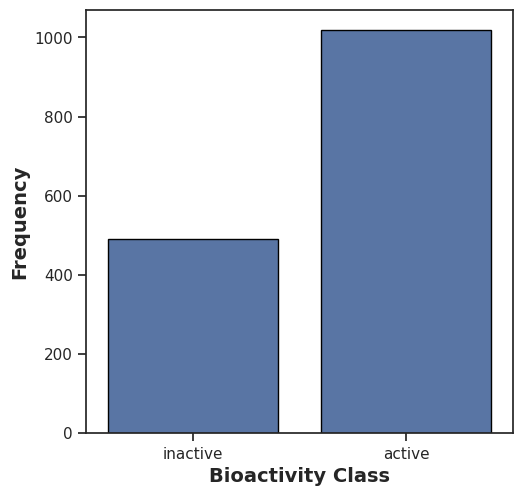

In [42]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


In [43]:
df_scattplt = pd.read_csv('bioactivity_data_pIC50_2.csv')
df_scattplt.replace([np.inf, -np.inf], np.nan, inplace=True)

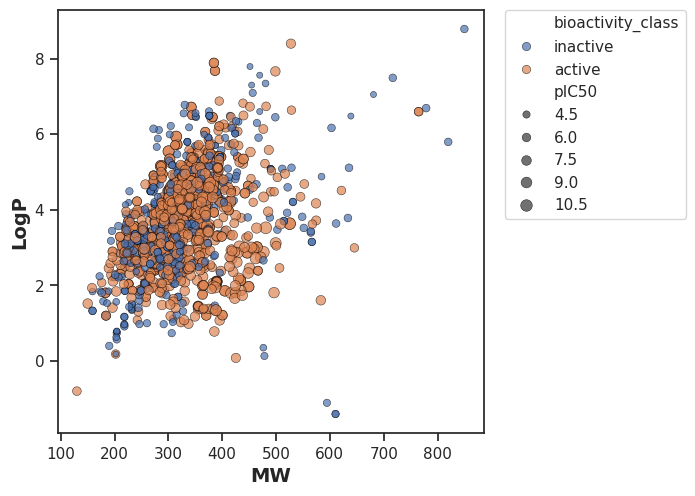

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_scattplt, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

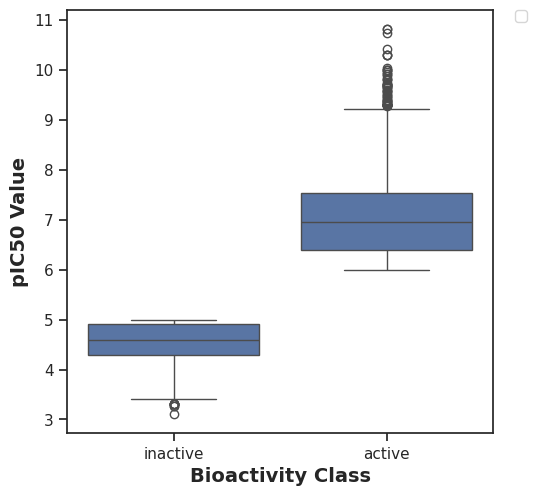

In [45]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='pIC50',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_ic50.pdf')

In [46]:
#Function to conduct a Mann-Whitney U test for descriptors
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  #Set the seed for the random number generator
  seed(1)

  selection = [descriptor, 'bioactivity_class'] #Select the descriptor and bioactivity_class columns from df_2class
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active'] #Filter the DataFrame to keep only the rows where bioactivity_class is active
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive'] #Filter the DataFrame to keep only the rows where bioactivity_class is inactive
  inactive = inactive[descriptor]

  #Conduct the Mann-Whitney U test
  stat, p = mannwhitneyu(active, inactive)

  #Set significance level
  alpha = 0.05
  #Results conditons
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  #Df with results
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [47]:
#Conducting Mann-Whitney U test and creating figures
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,501348.0,2.316977e-218,0.05,Different distribution (reject H0)


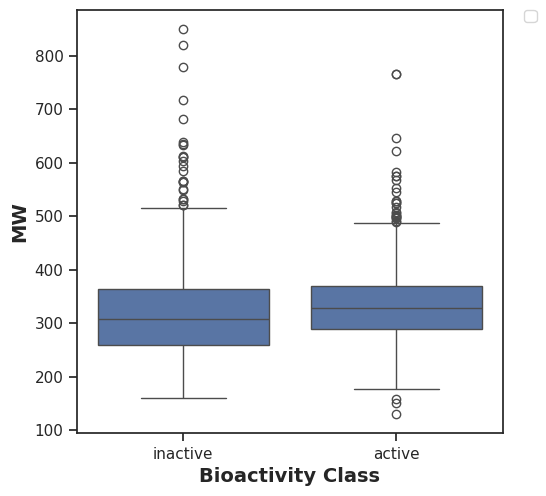

In [48]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='MW',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_MW.pdf')

In [49]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,284791.0,0.000018,0.05,Different distribution (reject H0)


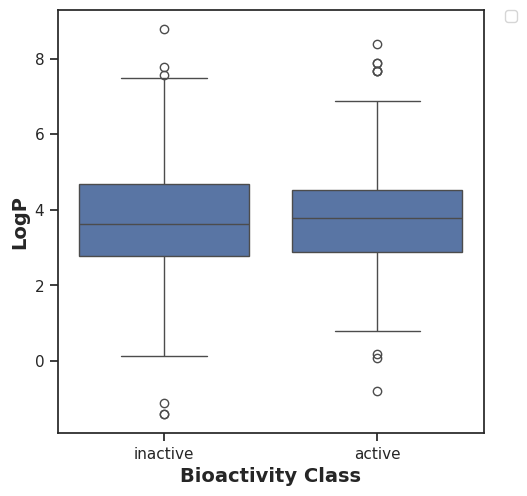

In [50]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='LogP',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_LogP.pdf')

In [51]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,252241.5,0.843704,0.05,Same distribution (fail to reject H0)


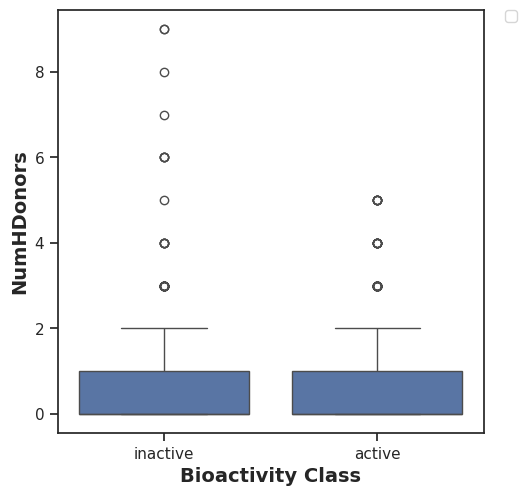

In [52]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHDonors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHDonors.pdf')

In [53]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,234631.0,0.023067,0.05,Different distribution (reject H0)


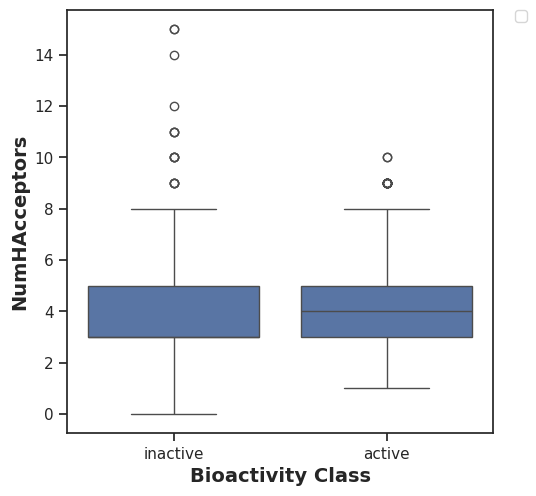

In [54]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHAcceptors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHAcceptors.pdf')

In [55]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,270837.0,0.009792,0.05,Different distribution (reject H0)


For this example, results from the Mann-Whitney U Test showed that the pIC50 had a statistically significant difference as the active and inactive bioactivity classes showed different distributions. For the Lipinski descriptors the MW, Hdonor and Hacceptor had statistically significant differences showing different distributions with the bioactivity classes. The LogP had no statistically significant difference as the distribution with the bioactivity classes were the same.


### Dataset Prep and Model Building

To prepare the data for running a regression model, it will use PaDEL to calculate the molecular descriptors of each molecule. PaDEL removes salts and small organic acids to purify the chemical structures, outputs the changes in canonical smile notation and assigns a PubChem fingerprint to each molecule. The PubChem fingerprint encodes molecular fragment information with 881 binary digits. This helps to describe the unique structural features of the molecules and allows the machine learning model to learn from the unique molecular properties of each fingerprint, and also be able to distinguish between compounds that are active and inactive. We want to observe which fingerprints are essential for creating a potent drug with minimal side effects. Lastly, to create the regression model using Random Forest Regressor, it will set the PubChem fingerprints as the X input and the pIC50 values as the Y output. Then, remove all the low variance values and split the data in an 80/20 ratio. Once running Random Forest Regressor, it will produce an r<sup>2</sup> value and will show a scatterplot of the experimental vs predicted pIC50 values to visualize the results.


In [56]:
#Installing PaDEL
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-03-31 05:36:23--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-03-31 05:36:23--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  94.5MB/s    in 0.3s    

2024-03-31 05:36:24 (94.5 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-03-31 05:36:24--  https://githu

In [57]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [58]:
#Selecting canonical_smiles and molecule_chembl_id columns and writing to molecule.smi
df_reg=pd.read_csv('bioactivity_data_pIC50_1.csv')
selection = ['canonical_smiles','molecule_chembl_id']
df_reg_selection = df_reg[selection]
df_reg_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False)

In [59]:
! cat molecule.smi | head -5

! cat molecule.smi | wc -l

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
2116


In [60]:
#Running PaDEL
! bash padel.sh

Processing CHEMBL341591 in molecule.smi (1/2116). 
Processing CHEMBL2111947 in molecule.smi (2/2116). 
Processing CHEMBL431859 in molecule.smi (3/2116). Average speed: 6.55 s/mol.
Processing CHEMBL113637 in molecule.smi (4/2116). Average speed: 3.31 s/mol.
Processing CHEMBL112021 in molecule.smi (5/2116). Average speed: 2.58 s/mol.
Processing CHEMBL324070 in molecule.smi (6/2116). Average speed: 1.95 s/mol.
Processing CHEMBL41761 in molecule.smi (7/2116). Average speed: 1.69 s/mol.
Processing CHEMBL111868 in molecule.smi (8/2116). Average speed: 1.48 s/mol.
Processing CHEMBL111888 in molecule.smi (9/2116). Average speed: 1.33 s/mol.
Processing CHEMBL112074 in molecule.smi (10/2116). Average speed: 1.19 s/mol.
Processing CHEMBL324326 in molecule.smi (11/2116). Average speed: 1.11 s/mol.
Processing CHEMBL37321 in molecule.smi (12/2116). Average speed: 1.00 s/mol.
Processing CHEMBL353068 in molecule.smi (13/2116). Average speed: 0.94 s/mol.
Processing CHEMBL166709 in molecule.smi (15/2116

In [61]:
#Droping Name column
df_X = pd.read_csv('descriptors_output.csv')
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df_Y = df_reg['pIC50']
df_Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2116, dtype: float64

In [203]:
#New df with selections
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.045757
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.142668
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [205]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"

    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    df.dropna(inplace=True)

    return df
clean_dataset(dataset)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.045757
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.142668
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [206]:
#Output to csv
dataset.to_csv('bioactivity_data_pIC50.csv')

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
#Splitting Pubchem ID and pIC50 value
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [209]:
Y = dataset.pIC50
Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2115, dtype: float64

In [210]:
X.shape

(2115, 881)

In [211]:
#Removing features based on selected variance threshold
from sklearn.feature_selection import VarianceThreshold
selection2 = VarianceThreshold(threshold=(.8*(1-.8)))
X2 = selection2.fit_transform(X)
X2.shape

(2115, 160)

In [212]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [213]:
X_train.shape, y_train.shape

((1692, 160), (1692,))

In [214]:
X_test.shape, y_test.shape

((423, 160), (423,))

In [215]:
!pip install xgboost
!pip install optuna

import xgboost as xgb
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

In [216]:
#Hyperparameter tuning via Optuna
def objective(trial):
      params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400, step=50),  # Number of sub-trees to train
        'max_depth': trial.suggest_int('max_depth', 2, 20),  # Maximum tree depth
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 1.00, step=0.05),  # Learning rate
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 100, log=True),  # L1 regularization rate
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 100, log=True),  # L2 regularization rate
        'gamma': trial.suggest_float('gamma', 0.0, 5.0, step=0.1),  # Complexity control
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum child weight
        'objective': 'reg:squarederror',
        'seed': trial.suggest_categorical('seed', [123])
    }

      clf = xgb.XGBRegressor(**params)
      score = cross_val_score(clf, X_train, y_train, scoring='r2', cv=5).mean()
      return score

In [217]:
# Create a study object
study = optuna.create_study(direction='maximize', sampler=TPESampler())

# Optimize the study
study.optimize(objective, n_trials=300)

# Print the best parameters found
print("Best parameters found: ", study.best_params)

# Print the highest accuracy found
print("Highest accuracy found: ", study.best_value)

[I 2024-03-31 06:49:25,486] A new study created in memory with name: no-name-81a55473-15ce-4f1c-81cd-1d38ab514990
[I 2024-03-31 06:49:25,863] Trial 0 finished with value: 0.3904177185098072 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.6000000000000001, 'reg_alpha': 5.359818097227612e-05, 'reg_lambda': 2.8457160857991766, 'gamma': 2.4000000000000004, 'min_child_weight': 7, 'seed': 123}. Best is trial 0 with value: 0.3904177185098072.
[I 2024-03-31 06:49:26,961] Trial 1 finished with value: 0.41374961626760165 and parameters: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.2, 'reg_alpha': 0.0006501980629622705, 'reg_lambda': 0.00020017120409944496, 'gamma': 4.2, 'min_child_weight': 1, 'seed': 123}. Best is trial 1 with value: 0.41374961626760165.
[I 2024-03-31 06:49:27,591] Trial 2 finished with value: 0.4185339549763857 and parameters: {'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.4, 'reg_alpha': 0.01655067384895503, 'reg_lambda': 4.3473

Best parameters found:  {'n_estimators': 350, 'max_depth': 15, 'learning_rate': 0.05, 'reg_alpha': 0.17487587278140998, 'reg_lambda': 4.7191444776088656e-05, 'gamma': 0.7000000000000001, 'min_child_weight': 7, 'seed': 123}
Highest accuracy found:  0.4508408787298076


In [218]:
# Best parameters
best_params = study.best_params

# Initialize a new XGBoost regressor with the best parameters
best_xgbr = xgb.XGBRegressor(**best_params)

# Fit the best model to the full training data
best_xgbr.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_xgbr.predict(X_test)# Best parameters

In [219]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared scores
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Absolute Error (MAE): 0.692610329120536
Mean Squared Error (MSE): 0.9113213488676567
Root Mean Squared Error (RMSE): 0.9546315251800858
R-squared score: 0.46133745914817414


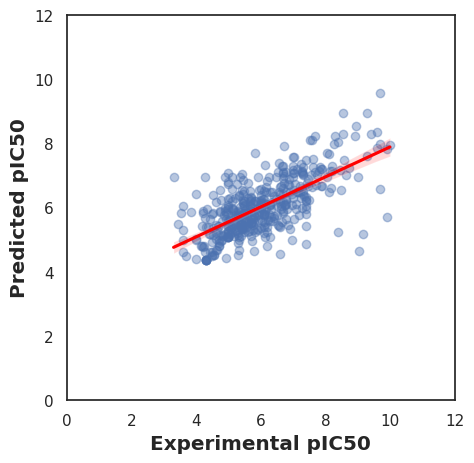

In [220]:
#Ploting results of experimental pIC50 vs predicited pIC50
sns.set (color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show
plt.savefig('Experimental_vs_Predicted_pIC50.pdf')

In [3]:
! zip -r results.zip . -i *.csv *.pdf

  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/california_housing_train.csv (deflated 79%)
  adding: sample_data/mnist_train_small.csv (deflated 88%)
  adding: sample_data/mnist_test.csv (deflated 88%)
